In [1]:
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
movies = pd.read_csv('IMDB.csv')
movies.head(3)

,Title,ReleaseDate,Color,Genre,Language,Country,Rating,Lead Actor,DirectorName,LeadActorFBLikes,CastFBLikes,DirectorFBLikes,MovieFBLikes,IMDbScore,TotalReviews,Duration,GrossRevenue,Budget
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
1,Metropolis,1/26/1927,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000
2,The Broadway Melody,11/11/1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000


Cleaning Data:

In [6]:
movies.shape

(3725, 18)

In [10]:
movies['Rating'] = movies['Rating'].fillna('Not Rated')

In [14]:
movies.isnull().sum()

Title               0
ReleaseDate         0
Color               0
Genre               0
Language            0
Country             0
Rating              0
Lead Actor          0
DirectorName        0
LeadActorFBLikes    0
CastFBLikes         0
DirectorFBLikes     0
MovieFBLikes        0
IMDbScore           0
TotalReviews        0
Duration            0
GrossRevenue        0
Budget              0
dtype: int64

In [12]:
movies.dropna(inplace=True)

In [13]:
movies.head(3)

,Title,ReleaseDate,Color,Genre,Language,Country,Rating,Lead Actor,DirectorName,LeadActorFBLikes,CastFBLikes,DirectorFBLikes,MovieFBLikes,IMDbScore,TotalReviews,Duration,GrossRevenue,Budget
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
1,Metropolis,1/26/1927,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000
2,The Broadway Melody,11/11/1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000


Derive Profit Margin:

In [16]:
movies['NetProfit'] = movies['GrossRevenue'] - movies['Budget']

Derive Release Month And Year:

In [20]:
movies['ReleaseYear'] = movies['ReleaseDate'].str.split('/').str[-1].astype('int64')
movies['ReleaseMonth'] = movies['ReleaseDate'].str.split('/').str[0].astype('int64')

In [22]:
pd.set_option('display.max_columns',21)

In [25]:
movies = movies.drop('ReleaseDate',axis=1)

In [27]:
movies['TotalReviews'] = movies['TotalReviews'].astype('int64')

In [30]:
movies['LeadActorFBLikes'] = movies['LeadActorFBLikes'].astype('int64')

In [33]:
movies['Duration'] = movies['Duration'].astype('int64')

In [34]:
movies.head(3)

,Title,Color,Genre,Language,Country,Rating,Lead Actor,DirectorName,LeadActorFBLikes,CastFBLikes,DirectorFBLikes,MovieFBLikes,IMDbScore,TotalReviews,Duration,GrossRevenue,Budget,NetProfit,ReleaseYear,ReleaseMonth
0,Over the Hill to the Poorhouse,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2,4,0,0,4.8,1,110,3000000,100000,2900000,1920,9
1,Metropolis,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136,203,756,12000,8.3,260,145,26435,6000000,-5973565,1927,1
2,The Broadway Melody,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77,109,4,167,6.3,36,100,2808000,379000,2429000,1929,11


In [40]:
movies.to_csv('Movies.csv',index=False)

Analysing movies data:

In [53]:
# Top 20 high budget movies af all time:
movies.groupby(['Title','Country','ReleaseYear']).agg({'Budget':'max'}).sort_values('Budget',ascending=False).head(20)

,,,Budget
Title,Country,ReleaseYear,
The Host,South Korea,2006,12215500000
Lady Vengeance,South Korea,2005,4200000000
Fateless,Hungary,2005,2500000000
Princess Mononoke,Japan,1997,2400000000
Steamboy,Japan,2004,2127519898
Akira,Japan,1988,1100000000
Godzilla 2000,Japan,1999,1000000000
Tango,Spain,1998,700000000
Kabhi Alvida Naa Kehna,India,2006,700000000


In [58]:
# Top 10 high profit hollywood films:
movies[movies['Country'] == 'USA'].groupby(['Title','ReleaseYear']).agg({'NetProfit':'max'}).sort_values('NetProfit',ascending=False).head(10)

,,NetProfit
Title,ReleaseYear,
Avatar,2009,523505847
Jurassic World,2015,502177271
Titanic,1997,458672302
Star Wars: Episode IV - A New Hope,1977,449935665
E.T. the Extra-Terrestrial,1982,424449459
The Avengers,2012,403279547
The Lion King,1994,377783777
Star Wars: Episode I - The Phantom Menace,1999,359544677
The Dark Knight,2008,348316061


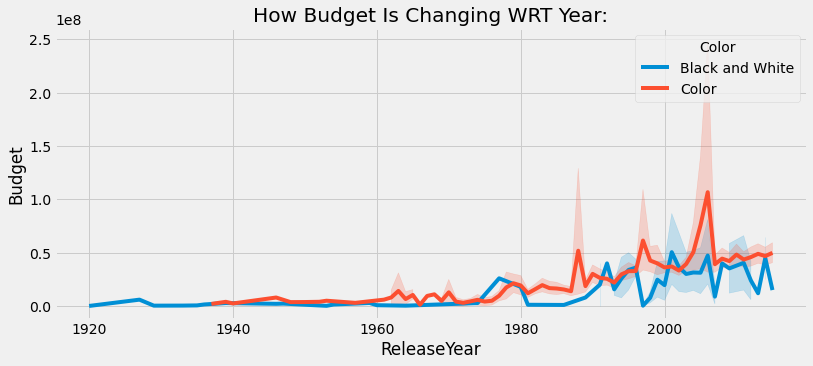

In [64]:
plt.figure(figsize=(12,5))
sn.lineplot(x = 'ReleaseYear',y = 'Budget',data = movies,hue='Color')
plt.title('How Budget Is Changing WRT Year:')
plt.show()

Top 10 directors directed most films:

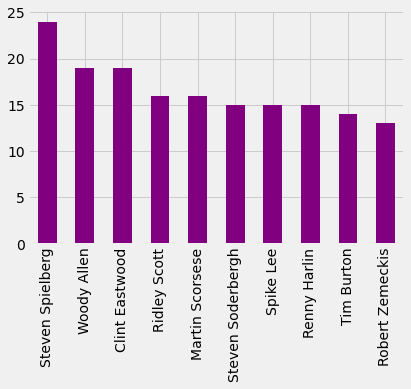

In [70]:
movies['DirectorName'].value_counts().head(10).plot(kind = 'bar',color = 'purple')
plt.show()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Movies.csv')
df.head(3)

,Title,Color,Genre,Language,Country,Rating,Lead Actor,DirectorName,LeadActorFBLikes,CastFBLikes,DirectorFBLikes,MovieFBLikes,IMDbScore,TotalReviews,Duration,GrossRevenue,Budget,NetProfit,ReleaseYear,ReleaseMonth
0,Over the Hill to the Poorhouse,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2,4,0,0,4.8,1,110,3000000,100000,2900000,1920,9
1,Metropolis,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136,203,756,12000,8.3,260,145,26435,6000000,-5973565,1927,1
2,The Broadway Melody,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77,109,4,167,6.3,36,100,2808000,379000,2429000,1929,11


In [6]:
df.groupby(['Lead Actor']).agg({'LeadActorFBLikes':'sum'}).sort_values(by = 'LeadActorFBLikes',ascending=False).head(10)

,LeadActorFBLikes
Lead Actor,
Johnny Depp,1320000
Robin Williams,1274000
Robert De Niro,902000
J.K. Simmons,672000
Darcy Donavan,640000
Jason Statham,624000
Jimmy Bennett,609000
Leonardo DiCaprio,580000
Robert Downey Jr.,525000
